In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import struct

N=944 # размер матрицы данных в файле grd
R = np.zeros ((N, N)) # матрица для прочитанных данных

def ReadFile(fname):
    try:
        f=open(fname, "rb")
        C=f.read(4).decode("utf-8")
        N_x=int.from_bytes(f.read(2), "little") # кол-во ячеек по Х
        N_y=int.from_bytes(f.read(2), "little") # кол-во ячеек по Y
        P=struct.unpack('6d', f.read(6*8))
        Matr = np.zeros ((N, N))
        # далее читаем матрицу построчно и записываем в Matr
        for i in range(N):
            for j in range(N):
                temp=struct.unpack('f', f.read(4))
                Matr[i][j]=temp[0]     
           
    except IOError:
        print("An IOError has occurred!")
    finally:
        f.close()
    return Matr

In [4]:
import re

In [5]:
import os
H = np.zeros((30, 944, 944))
i = 0
for filename in os.listdir("Data/raschet/"):
    if bool(re.search(r'^H_', filename)): 
        H[i]=ReadFile("Data/raschet/" + str(filename))
        i += 1
        continue
    else:
        continue

In [6]:
rusla = ReadFile("Data/eriki.grd")
# карта дорог
Road = ReadFile("Data/road_all_2022.grd")
# рельеф
relief = ReadFile("Data/relief_base.grd")

In [7]:
df = pd.read_csv("Data/координаты_дорог_ВАП.txt", sep="\t", names=['index', 'i', 'j', 'id_road'])

In [8]:
df.head()

,index,i,j,id_road
0,1,676,198,1
1,2,675,198,1
2,3,675,199,1
3,4,674,199,1
4,5,674,200,1


In [9]:
number_road = np.sort(df['id_road'].unique())

In [332]:
# номер дороги
number_road

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 14, 15, 16, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
       56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72,
       73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 88, 95, 96, 98],
      dtype=int64)

In [10]:
# длина дороги
road_len = [df[df['id_road'] == i]['id_road'].count() for i in number_road]

In [ ]:
# координаты дороги
coordinate_road = pd.Series([(i, j) for i, j in zip(df[df['id_road']==k]['i'], df[df['id_road']==k]['j'])] \
    for k in number_road)

In [34]:
# координаты дороги
i_coordinate_road = pd.Series([i for i in df[df['id_road']==k]['i']] for k in number_road)
j_coordinate_road = pd.Series([j for j in df[df['id_road']==k]['j']] for k in number_road)

In [37]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,mean_high,max_high,time_start,distance1,distance2
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,4.859626,7.247191,10,0.000000,35.440090
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,2.091687,3.339834,12,17.204651,17.204651
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,0.000000,0.000000,-1,-1.000000,-1.000000
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,0.000000,0.000000,-1,-1.000000,-1.000000
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,0.000000,0.000000,-1,-1.000000,-1.000000


In [35]:
i_coordinate_road

0     [676, 675, 675, 674, 674, 674, 673, 673, 672, ...
1     [657, 656, 656, 655, 655, 654, 653, 653, 652, ...
2     [644, 644, 644, 644, 644, 644, 644, 644, 644, ...
3     [645, 645, 645, 645, 645, 645, 645, 645, 645, ...
4     [643, 643, 643, 643, 643, 642, 642, 642, 642, ...
                            ...                        
78    [453, 453, 453, 453, 453, 452, 452, 451, 450, ...
79    [515, 515, 514, 514, 513, 513, 513, 513, 513, ...
80    [624, 624, 625, 625, 625, 626, 626, 627, 627, ...
81    [644, 643, 643, 642, 642, 642, 642, 642, 642, ...
82    [731, 731, 730, 729, 729, 729, 728, 728, 728, ...
Length: 83, dtype: object

In [ ]:
d = {'id_road' : number_road, 'coordinate' : coordinate_road, 'len_road' : road_len}
data = pd.DataFrame(d)

In [12]:
d = {'id_road' : number_road, 'i_coordinate' : i_coordinate_road, 'j_coordinate' : j_coordinate_road, 'len_road' : road_len}
ds = pd.DataFrame(d)

In [13]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33


In [ ]:
data.head()

,id_road,coordinate,len_road
0,1,"[(676, 198), (675, 198), (675, 199), (674, 199...",110
1,2,"[(657, 268), (656, 268), (656, 269), (655, 269...",44
2,3,"[(644, 280), (644, 279), (644, 280), (644, 281...",35
3,4,"[(645, 310), (645, 310), (645, 311), (645, 311...",44
4,5,"[(643, 336), (643, 337), (643, 337), (643, 338...",33


In [ ]:
np.array(data[data['id_road'] == 1]['coordinate'].to_list()).reshape(\
    np.array(data[data['id_road'] == 1]['coordinate'].to_list()).shape[1],\
         2)[0:110, 0]

array([676, 675, 675, 674, 674, 674, 673, 673, 672, 672, 672, 672, 671,
       671, 671, 670, 670, 670, 669, 669, 669, 669, 669, 668, 668, 668,
       668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 667, 667,
       667, 667, 667, 667, 667, 667, 667, 666, 666, 666, 666, 666, 666,
       666, 666, 666, 666, 665, 665, 665, 665, 665, 665, 665, 665, 665,
       664, 664, 664, 664, 664, 664, 664, 664, 663, 663, 663, 663, 663,
       663, 663, 663, 663, 662, 662, 662, 662, 662, 662, 662, 662, 662,
       662, 661, 661, 661, 661, 661, 661, 661, 660, 660, 660, 660, 660,
       659, 659, 659, 658, 658, 657])

In [ ]:
int(data[data['id_road'] == 1]['len_road'])

110

In [ ]:
int(ds[ds['id_road'] == 1]['len_road'])

110

In [ ]:
np.array(ds[ds['id_road'] == 1]['i_coordinate'].to_list()).reshape(int(ds[ds['id_road'] == 1]['len_road']))

array([676, 675, 675, 674, 674, 674, 673, 673, 672, 672, 672, 672, 671,
       671, 671, 670, 670, 670, 669, 669, 669, 669, 669, 668, 668, 668,
       668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 668, 667, 667,
       667, 667, 667, 667, 667, 667, 667, 666, 666, 666, 666, 666, 666,
       666, 666, 666, 666, 665, 665, 665, 665, 665, 665, 665, 665, 665,
       664, 664, 664, 664, 664, 664, 664, 664, 663, 663, 663, 663, 663,
       663, 663, 663, 663, 662, 662, 662, 662, 662, 662, 662, 662, 662,
       662, 661, 661, 661, 661, 661, 661, 661, 660, 660, 660, 660, 660,
       659, 659, 659, 658, 658, 657])

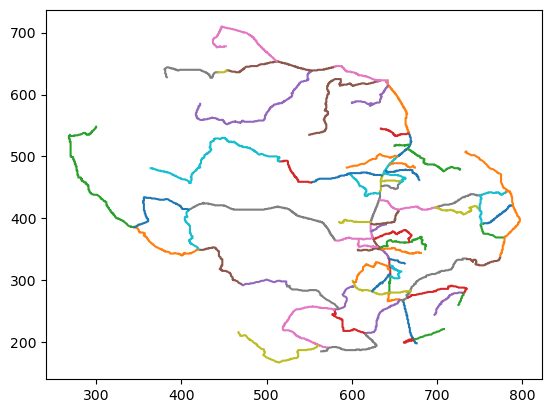

In [ ]:
for i in data['id_road']:
     plt.plot(np.array(data[data['id_road'] == i]['coordinate'].to_list()).reshape(\
     np.array(data[data['id_road'] == i]['coordinate'].to_list()).shape[1],\
          2)[0:int(data[data['id_road'] == i]['len_road']), 0], np.array(data[data['id_road'] == i]['coordinate'].to_list()).reshape(\
     np.array(data[data['id_road'] == i]['coordinate'].to_list()).shape[1],\
          2)[0:int(data[data['id_road'] == i]['len_road']), 1], label='Дорога1')

In [ ]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33


In [ ]:
shape(1, 110)

In [14]:
# среднее и максимальное значение высоты слоя воды на 
# затопленных фрагментах (на конец затопления).
Max_high = []
Mean_high = []
for i in ds['id_road'].to_list():
    k = H[29][np.array(ds[ds['id_road'] == i]['i_coordinate'].to_list()).reshape(int(ds[ds['id_road'] == i]['len_road'])), 
    np.array(ds[ds['id_road'] == i]['j_coordinate'].to_list()).reshape( \
    int(ds[ds['id_road'] == i]['len_road']))]
    
    if k.max() > 0.5:
        Mean_high.append(k[k > 0.5].mean())
        Max_high.append(k[k > 0.5].max())
    else:
        Mean_high.append(0)
        Max_high.append(0)

In [15]:
ds['mean_high'] = Mean_high
ds['max_high'] = Max_high

In [16]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,mean_high,max_high
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,4.859626,7.247191
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,2.091687,3.339834
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,0.000000,0.000000
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,0.000000,0.000000
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,0.000000,0.000000


In [17]:
# Время начала затопления
time_start = []
for i in ds['id_road']:
    for j in range(0, 30):
        k = H[j][np.array(ds[ds['id_road'] == i]['i_coordinate'].to_list()).reshape(int(ds[ds['id_road'] == i]['len_road'])), 
        np.array(ds[ds['id_road'] == i]['j_coordinate'].to_list()).reshape( \
        int(ds[ds['id_road'] == i]['len_road']))]
        if k.max() > 0.5:
            time_start.append(j)
            break
        if j==29 and k.max() <= 0.5:
            time_start.append(-1)

In [18]:
ds['time_start'] = time_start

In [19]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,mean_high,max_high,time_start
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,4.859626,7.247191,10
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,2.091687,3.339834,12
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,0.000000,0.000000,-1
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,0.000000,0.000000,-1
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,0.000000,0.000000,-1


In [20]:
len(Max_high), len(Mean_high)

(83, 83)

In [21]:
def distance(xa, xb, ya, yb):
    return (np.sqrt(np.power((xb-xa), 2)+np.power((yb-ya), 2)))

In [22]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,mean_high,max_high,time_start
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,4.859626,7.247191,10
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,2.091687,3.339834,12
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,0.000000,0.000000,-1
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,0.000000,0.000000,-1
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,0.000000,0.000000,-1


In [ ]:
H[time_start[0]][np.array(ds[ds['id_road'] == 1]['i_coordinate'].to_list()).reshape(int(ds[ds['id_road'] == 1]['len_road'])), 
np.array(ds[ds['id_road'] == 1]['j_coordinate'].to_list()).reshape( \
int(ds[ds['id_road'] == 1]['len_road']))]

In [23]:
# расстояния (от начала дороги) до начала первого 
# и конца последнего затопленных фрагментов (на момент начала затопления)
start_distance = []
end_distance = []
j = -1
for i in ds['id_road']:
    j += 1
    if time_start[j] != -1:
        k = H[time_start[j]][np.array(ds[ds['id_road'] == i]['i_coordinate'].to_list()).reshape(int(ds[ds['id_road'] == i]['len_road'])), 
        np.array(ds[ds['id_road'] == i]['j_coordinate'].to_list()).reshape( \
        int(ds[ds['id_road'] == i]['len_road']))]
        
        start = k[k > 0.5][0]
        end = k[k > 0.5][-1]
        
        i_start = np.argwhere(H[time_start[j]] == start)[0][0]
        j_start = np.argwhere(H[time_start[j]] == start)[0][1]
        
        i_end = np.argwhere(H[time_start[j]] == end)[0][0]
        j_end = np.argwhere(H[time_start[j]] == end)[0][1]
        
        start_distance.append(distance(ds[ds['id_road']==i]['i_coordinate'].to_list()[0][0], i_start,ds[ds['id_road']==i]['j_coordinate'].to_list()[0][0], j_start))
        
        end_distance.append(distance(ds[ds['id_road']==i]['i_coordinate'].to_list()[0][0], \
        i_end, ds[ds['id_road']==i]['j_coordinate'].to_list()[0][0], j_end))
    else:
        start_distance.append(-1)
        end_distance.append(-1)
    

In [24]:
ds['distance1'] = start_distance
ds['distance2'] = end_distance

In [25]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,mean_high,max_high,time_start,distance1,distance2
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,4.859626,7.247191,10,0.000000,35.440090
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,2.091687,3.339834,12,17.204651,17.204651
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,0.000000,0.000000,-1,-1.000000,-1.000000
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,0.000000,0.000000,-1,-1.000000,-1.000000
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,0.000000,0.000000,-1,-1.000000,-1.000000


In [39]:
ds

,id_road,i_coordinate,j_coordinate,len_road,mean_high,max_high,time_start,distance1,distance2
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,4.859626,7.247191,10,0.000000,35.440090
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,2.091687,3.339834,12,17.204651,17.204651
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,0.000000,0.000000,-1,-1.000000,-1.000000
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,0.000000,0.000000,-1,-1.000000,-1.000000
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,0.000000,0.000000,-1,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...
78,84,"[453, 453, 453, 453, 453, 452, 452, 451, 450, ...","[639, 639, 638, 638, 638, 638, 637, 637, 636, ...",18,0.000000,0.000000,-1,-1.000000,-1.000000
79,88,"[515, 515, 514, 514, 513, 513, 513, 513, 513, ...","[492, 492, 492, 493, 493, 494, 495, 496, 496, ...",310,1.528482,2.974943,14,109.110036,110.679718
80,95,"[624, 624, 625, 625, 625, 626, 626, 627, 627, ...","[282, 283, 284, 284, 285, 285, 286, 286, 287, ...",43,0.000000,0.000000,-1,-1.000000,-1.000000
81,96,"[644, 643, 643, 642, 642, 642, 642, 642, 642, ...","[317, 317, 318, 319, 320, 320, 320, 321, 321, ...",81,0.000000,0.000000,-1,-1.000000,-1.000000


In [41]:
# Упорядочить дороги по временам начала затопления
ds[ds['time_start']!=-1].sort_values(by='time_start')

,id_road,i_coordinate,j_coordinate,len_road,mean_high,max_high,time_start,distance1,distance2
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,4.859626,7.247191,10,0.000000,35.440090
73,78,"[697, 698, 698, 699, 700, 701, 702, 703, 704, ...","[282, 282, 283, 283, 284, 285, 285, 285, 286, ...",61,2.475899,5.001425,10,38.209946,37.121422
71,76,"[782, 783, 784, 785, 785, 785, 786, 786, 786, ...","[443, 444, 444, 444, 443, 442, 442, 441, 440, ...",115,2.127921,4.880002,10,59.682493,68.029405
61,66,"[419, 418, 417, 416, 415, 413, 412, 411, 411, ...","[349, 349, 348, 347, 346, 345, 344, 343, 343, ...",118,2.358535,4.619504,10,16.155494,16.155494
58,63,"[560, 560, 559, 559, 559, 558, 557, 556, 556, ...","[195, 194, 194, 193, 192, 191, 191, 190, 190, ...",107,1.838877,4.765082,10,95.126232,95.341491
45,50,"[774, 774, 773, 773, 773, 772, 771, 770, 769, ...","[337, 336, 335, 334, 333, 332, 332, 331, 331, ...",66,3.084533,4.943355,10,1.000000,23.021729
44,49,"[729, 728, 727, 726, 725, 725, 724, 723, 722, ...","[280, 280, 280, 280, 280, 280, 279, 279, 279, ...",72,2.944979,5.247561,10,40.360872,48.166378
82,98,"[731, 731, 730, 729, 729, 729, 728, 728, 728, ...","[278, 276, 275, 274, 273, 271, 270, 269, 267, ...",16,2.731337,3.958619,10,2.000000,17.720045
51,56,"[783, 783, 781, 781, 780, 778, 778, 777, 777, ...","[444, 445, 446, 447, 448, 449, 450, 451, 453, ...",62,1.465706,3.486133,11,75.604233,77.620873
77,83,"[524, 525, 526, 527, 527, 527, 527, 528, 529, ...","[290, 290, 290, 291, 290, 289, 288, 287, 286, ...",54,2.716367,2.716367,11,6.403124,6.403124


In [42]:

ds.sort_values(by='time_start')

,id_road,i_coordinate,j_coordinate,len_road,mean_high,max_high,time_start,distance1,distance2
16,21,"[630, 630, 629, 628, 628, 627, 626, 626, 625, ...","[354, 354, 354, 354, 354, 354, 354, 354, 354, ...",47,0.000000,0.000000,-1,-1.000000,-1.000000
35,40,"[654, 655, 655, 655, 654, 654, 654, 653, 653, ...","[414, 413, 412, 411, 411, 410, 409, 409, 408, ...",62,0.000000,0.000000,-1,-1.000000,-1.000000
36,41,"[633, 634, 634, 635, 636, 637, 638, 639, 640, ...","[430, 429, 429, 429, 429, 429, 429, 428, 428, ...",38,0.000000,0.000000,-1,-1.000000,-1.000000
29,34,"[658, 657, 656, 655, 654, 654, 653, 652, 651, ...","[314, 314, 315, 315, 315, 316, 316, 317, 317, ...",47,0.000000,0.000000,-1,-1.000000,-1.000000
28,33,"[644, 645, 646, 647, 648, 649, 650, 651, 652, ...","[280, 280, 280, 280, 280, 280, 280, 280, 280, ...",29,0.000000,0.000000,-1,-1.000000,-1.000000
...,...,...,...,...,...,...,...,...,...
66,71,"[512, 511, 510, 510, 509, 508, 508, 507, 506, ...","[654, 655, 656, 656, 657, 658, 659, 660, 661, ...",188,0.794451,1.128848,20,70.837843,70.837843
33,38,"[667, 667, 667, 667, 667, 667, 666, 667, 668, ...","[362, 363, 364, 364, 365, 366, 367, 368, 368, ...",93,1.294937,1.974837,20,32.572995,36.674242
39,44,"[656, 657, 658, 659, 660, 660, 659, 659, 659, ...","[457, 458, 458, 459, 460, 460, 461, 461, 462, ...",54,0.963716,1.240674,20,2.236068,9.899495
38,43,"[658, 658, 657, 656, 655, 654, 654, 653, 652, ...","[461, 461, 461, 460, 460, 460, 460, 460, 460, ...",36,1.240628,1.240633,20,0.000000,1.000000


In [43]:
# Упорядочить дороги по длинам
ds.sort_values(by='len_road')

,id_road,i_coordinate,j_coordinate,len_road,mean_high,max_high,time_start,distance1,distance2
82,98,"[731, 731, 730, 729, 729, 729, 728, 728, 728, ...","[278, 276, 275, 274, 273, 271, 270, 269, 267, ...",16,2.731337,3.958619,10,2.000000,17.720045
30,35,"[662, 661, 659, 658, 656, 655, 655, 654, 654, ...","[327, 328, 328, 328, 329, 329, 330, 331, 332, ...",17,0.562480,0.562928,17,7.280110,7.280110
78,84,"[453, 453, 453, 453, 453, 452, 452, 451, 450, ...","[639, 639, 638, 638, 638, 638, 637, 637, 636, ...",18,0.000000,0.000000,-1,-1.000000,-1.000000
5,6,"[633, 632, 632, 631, 631, 630, 630, 629, 629, ...","[352, 353, 354, 354, 355, 355, 356, 357, 358, ...",22,0.000000,0.000000,-1,-1.000000,-1.000000
13,15,"[672, 671, 670, 669, 668, 666, 665, 664, 663, ...","[203, 203, 202, 202, 202, 201, 201, 200, 199, ...",22,1.832960,3.411023,11,11.401754,11.401754
...,...,...,...,...,...,...,...,...,...
56,61,"[571, 570, 569, 568, 567, 566, 565, 565, 564, ...","[191, 191, 192, 192, 192, 192, 193, 193, 194, ...",191,1.401513,3.731297,11,61.587336,70.724819
25,30,"[633, 632, 631, 630, 629, 628, 627, 626, 625, ...","[622, 622, 621, 621, 621, 621, 620, 620, 619, ...",208,1.431970,1.478826,16,94.111636,99.488693
17,22,"[580, 580, 579, 579, 578, 578, 578, 577, 577, ...","[365, 366, 367, 368, 368, 369, 370, 371, 372, ...",236,2.269021,2.345173,14,116.777566,164.915130
79,88,"[515, 515, 514, 514, 513, 513, 513, 513, 513, ...","[492, 492, 492, 493, 493, 494, 495, 496, 496, ...",310,1.528482,2.974943,14,109.110036,110.679718


In [45]:
# Вывести незатапливаемые дороги
ds[ds['max_high'] == 0]

,id_road,i_coordinate,j_coordinate,len_road,mean_high,max_high,time_start,distance1,distance2
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,0.0,0.0,-1,-1.0,-1.0
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,0.0,0.0,-1,-1.0,-1.0
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,0.0,0.0,-1,-1.0,-1.0
5,6,"[633, 632, 632, 631, 631, 630, 630, 629, 629, ...","[352, 353, 354, 354, 355, 355, 356, 357, 358, ...",22,0.0,0.0,-1,-1.0,-1.0
6,7,"[624, 624, 624, 623, 623, 623, 623, 623, 623, ...","[371, 372, 373, 373, 374, 375, 376, 377, 378, ...",37,0.0,0.0,-1,-1.0,-1.0
7,8,"[622, 622, 623, 623, 623, 623, 623, 624, 624, ...","[395, 396, 396, 397, 398, 399, 400, 400, 401, ...",58,0.0,0.0,-1,-1.0,-1.0
8,9,"[633, 634, 634, 634, 634, 634, 634, 634, 634, ...","[444, 445, 446, 447, 448, 449, 450, 451, 452, ...",35,0.0,0.0,-1,-1.0,-1.0
12,14,"[708, 707, 706, 705, 704, 704, 703, 702, 700, ...","[221, 221, 220, 220, 219, 219, 218, 217, 217, ...",30,0.0,0.0,-1,-1.0,-1.0
14,16,"[656, 656, 655, 655, 654, 654, 654, 653, 653, ...","[268, 267, 266, 265, 265, 264, 263, 262, 262, ...",94,0.0,0.0,-1,-1.0,-1.0
15,20,"[634, 633, 632, 631, 631, 630, 629, 628, 628, ...","[350, 350, 350, 350, 351, 351, 351, 352, 352, ...",38,0.0,0.0,-1,-1.0,-1.0


In [29]:
# Вывести затапливаемые дороги
ds[ds['mean_high'] != 0]

,id_road,i_coordinate,j_coordinate,len_road,mean_high,max_high,time_start,distance1,distance2
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,4.859626,7.247191,10,0.000000,35.440090
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,2.091687,3.339834,12,17.204651,17.204651
9,10,"[637, 637, 638, 638, 639, 638, 639, 639, 639, ...","[472, 473, 474, 475, 476, 476, 476, 477, 478, ...",38,3.497713,3.497713,13,2.236068,2.236068
10,11,"[655, 655, 656, 656, 657, 657, 658, 658, 659, ...","[501, 502, 502, 503, 503, 504, 504, 505, 505, ...",49,2.078061,2.363233,12,1.000000,29.529646
11,12,"[667, 666, 666, 666, 666, 666, 665, 665, 665, ...","[539, 539, 540, 541, 542, 543, 543, 544, 545, ...",103,0.651821,0.720668,15,1.414214,1.414214
13,15,"[672, 671, 670, 669, 668, 666, 665, 664, 663, ...","[203, 203, 202, 202, 202, 201, 201, 200, 199, ...",22,1.832960,3.411023,11,11.401754,11.401754
17,22,"[580, 580, 579, 579, 578, 578, 578, 577, 577, ...","[365, 366, 367, 368, 368, 369, 370, 371, 372, ...",236,2.269021,2.345173,14,116.777566,164.915130
19,24,"[632, 631, 631, 630, 630, 629, 629, 628, 627, ...","[441, 440, 440, 440, 440, 440, 440, 441, 441, ...",86,0.886751,0.901038,18,16.031220,15.297059
20,25,"[635, 634, 633, 632, 631, 630, 629, 628, 627, ...","[469, 470, 470, 470, 470, 470, 470, 470, 470, ...",115,1.458376,2.120527,13,42.011903,77.524190
21,26,"[653, 651, 650, 649, 647, 646, 646, 644, 643, ...","[500, 501, 501, 500, 499, 499, 498, 498, 499, ...",46,1.596550,1.596550,13,3.162278,3.162278


In [30]:
import matplotlib.colors as mcolors

In [31]:
l = ['#619bcc', '#5b97ca',
'#5593c8',
'#4f8fc6',
'#488bc4',
'#4288c2',
'#3d84bf',
'#397bb3',
'#3777ac',
'#3573a6',
'#336ea0',
'#316a9a',
'#2f6694',
'#2d618e',
'#2b5d87',
'#295981',
'#27557b',
'#255075',
'#234c6f',
'#214868',
'#1f4462',
'#1d3f5c',
'#1b3b56',
'#193750',
'#17334a',
'#152e43',
'#132a3d',
'#112637',
'#0f2231',
'#0d1d2b',
'#0b1925',
'#09151e']

In [32]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,mean_high,max_high,time_start,distance1,distance2
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,4.859626,7.247191,10,0.000000,35.440090
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,2.091687,3.339834,12,17.204651,17.204651
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,0.000000,0.000000,-1,-1.000000,-1.000000
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,0.000000,0.000000,-1,-1.000000,-1.000000
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,0.000000,0.000000,-1,-1.000000,-1.000000


In [ ]:
for j in ds['id_road']:
     plt.plot(np.array(ds[ds['id_road'] == j]['j_coordinate'].to_list()).reshape(\
          int(ds[ds['id_road'] == j]['len_road'])), np.array(ds[ds['id_road'] == j]['i_coordinate'].to_list()).reshape(\
          int(ds[ds['id_road'] == j]['len_road'])), color='000')
plt.pcolormesh(np.where(H[29] != 0, H[29], np.nan), cmap=mcolors.ListedColormap(l))

In [48]:
k = H[29][np.array(ds[ds['id_road'] == 1]['i_coordinate'].to_list()).reshape(int(ds[ds['id_road'] == 1]['len_road'])), 
np.array(ds[ds['id_road'] == 1]['j_coordinate'].to_list()).reshape( \
int(ds[ds['id_road'] == 1]['len_road']))]

k[k > 0.5]

array([6.28444147, 4.84559202, 5.213274  , 3.53779221, 3.84351468,
       4.32058954, 2.39051938, 1.30728853, 0.74953377, 3.74592638,
       5.24611425, 6.24632311, 7.2463789 , 7.24624348, 7.24653292,
       7.24653292, 7.24650908, 7.24719143, 7.24719143, 7.24719143,
       7.24700642, 7.24700642, 7.24649525, 7.24649525, 5.24574423,
       4.74716377, 4.74716377, 6.24738121, 5.74680901, 5.74680901,
       5.24688435, 5.74636173, 5.74666691, 5.74666691, 6.24702883,
       6.24702883, 4.24707603, 4.24707603, 4.24708605, 2.74691582,
       3.74737287, 3.74737287, 3.74713397, 3.7470932 , 3.7470932 ,
       3.2469542 , 2.24717307, 1.24706805, 1.24706805, 1.7375195 ,
       1.7375195 ])

In [89]:
ds.head()

,id_road,i_coordinate,j_coordinate,len_road,mean_high,max_high,time_start,distance1,distance2
0,1,"[676, 675, 675, 674, 674, 674, 673, 673, 672, ...","[198, 198, 199, 199, 200, 201, 202, 203, 203, ...",110,4.859626,7.247191,10,0.000000,35.440090
1,2,"[657, 656, 656, 655, 655, 654, 653, 653, 652, ...","[268, 268, 269, 269, 269, 269, 269, 269, 269, ...",44,2.091687,3.339834,12,17.204651,17.204651
2,3,"[644, 644, 644, 644, 644, 644, 644, 644, 644, ...","[280, 279, 280, 281, 282, 283, 284, 285, 286, ...",35,0.000000,0.000000,-1,-1.000000,-1.000000
3,4,"[645, 645, 645, 645, 645, 645, 645, 645, 645, ...","[310, 310, 311, 311, 312, 312, 313, 313, 314, ...",44,0.000000,0.000000,-1,-1.000000,-1.000000
4,5,"[643, 643, 643, 643, 643, 642, 642, 642, 642, ...","[336, 337, 337, 338, 338, 339, 339, 340, 340, ...",33,0.000000,0.000000,-1,-1.000000,-1.000000


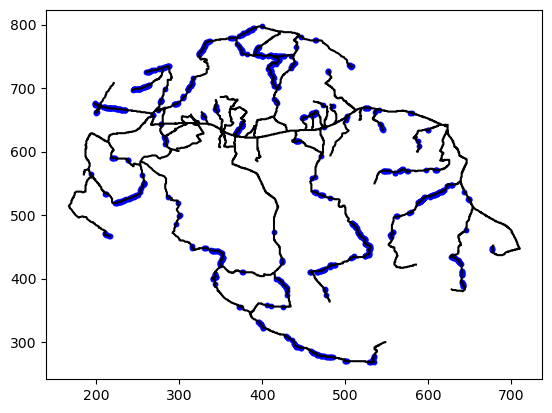

In [155]:
h = H[29]
z_i = []
z_j = []
for j in ds['id_road']:
    plt.plot(np.array(ds[ds['id_road'] == j]['j_coordinate'].to_list()).reshape(\
            int(ds[ds['id_road'] == j]['len_road'])), np.array(ds[ds['id_road'] == j]['i_coordinate'].to_list()).reshape(\
            int(ds[ds['id_road'] == j]['len_road'])), color='000')
    if int(ds[ds['id_road'] == j]['time_start']) !=-1:
        for _i, _j in zip(np.array(ds[ds['id_road']==j]['i_coordinate'].to_list()).reshape(int(ds[ds['id_road'] == j]['len_road'])), \
            np.array(ds[ds['id_road']==j]['j_coordinate'].to_list()).reshape(int(ds[ds['id_road'] == j]['len_road']))):
                if h[_i, _j] > 0.5:
                    z_i.append(_i)
                    z_j.append(_j)
        plt.scatter(z_j, z_i, color='blue', s=10)
        z_i = []
        z_j = []

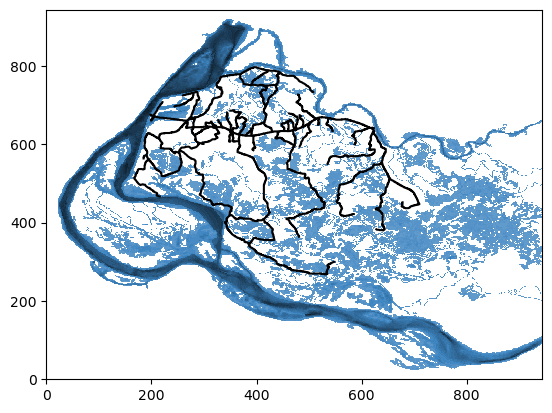

In [46]:
for j in ds['id_road']:
     plt.plot(np.array(ds[ds['id_road'] == j]['j_coordinate'].to_list()).reshape(\
          int(ds[ds['id_road'] == j]['len_road'])), np.array(ds[ds['id_road'] == j]['i_coordinate'].to_list()).reshape(\
          int(ds[ds['id_road'] == j]['len_road'])), color='000')
plt.pcolormesh(np.where(H[29] != 0, H[29], np.nan), cmap=mcolors.ListedColormap(l))